# Unbalanced Creditcard data

In [20]:

import sys
import numpy
import pandas
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import scipy
import sklearn
print ('Python: {}'.format(sys.version))
print ('Numpy: {}'.format(numpy.__version__))
print ('Pandas: {}'.format(pandas.__version__))
print ('Matplotlib: {}'.format(matplotlib.__version__))
print ('Seaborn: {}'.format(seaborn.__version__))
print ('Scipy: {}'.format(scipy.__version__))
print ('Sklearn: {}'.format(sklearn.__version__))

Python: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Numpy: 1.19.5
Pandas: 1.2.3
Matplotlib: 3.3.4
Seaborn: 0.10.0
Scipy: 1.6.1
Sklearn: 0.24.1


In [21]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn

In [22]:
data = pd.read_csv("creditcard.csv")

# Creditcard visualization

As we will shortly see, from data.head() y data.shape we can distinguish  among the different columns:
Time == Time between transaction.
V1-V28 == PCE dimensionality reduction to protect both identity and localization of clients.
Amount ==  Total amount of money.


# Class: IMPORTANT. 
The "Class" column contains 0's {No Fraud} and 1's {Fraud}. Through value_counts we can see how many 1's and 0's actually exist.

In [23]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
data.shape

(284807, 31)

In [25]:
(data["Class"].value_counts(()))

0    284315
1       492
Name: Class, dtype: int64

# Porcentage of Fraudes
The following lines of code calculate the number of Fraud and Valid Transactions.
Ratio_Fraud_percentge = 0.1727% reflects that the number of frauds is very low.

0.1727485630620034


<AxesSubplot:xlabel='Class', ylabel='count'>

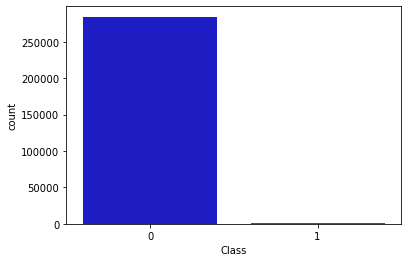

In [26]:
Valid = len(data[data["Class"] == 0])
Fraud = len(data[data["Class"] == 1])
Ratio_Fraud_percentage =  (Fraud / (Fraud + Valid)) * 100
print(Ratio_Fraud_percentage)
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=data, palette=colors)

# Paritial porcentage of Fraude
Next we will calculate a fraction of the total data [10% data].
We want to check that the Ratio_Fraud_percentage is not modified.

In [27]:
fraction = 0.1
data = data.sample(frac = fraction, random_state = 1)
print(data.shape)
Valid = len(data[data["Class"] == 0])
Fraud = len(data[data["Class"] == 1])
Ratio_Fraud_percentage =  (Fraud / (Fraud + Valid)) * 100 
#In the tutorial there is a mistake here!. Fraud is not included in the denominator!

(28481, 31)


0.17204452090867595


<AxesSubplot:xlabel='Class', ylabel='count'>

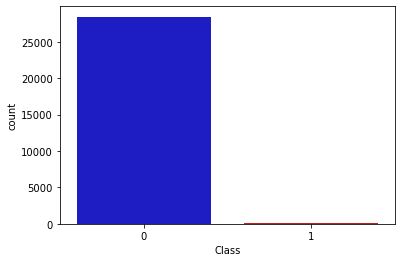

In [28]:
print(Ratio_Fraud_percentage)
#Ratio_Fraud_percentage = 0.1720 ---> minimum variation.
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=data, palette=colors)

# Correlation matrix
Now, we want to see the correlation between the representative features of the data fraction.
To see the correlation, we will use a colormap using seaborn where 1 means entirely correlated (see diagonal).

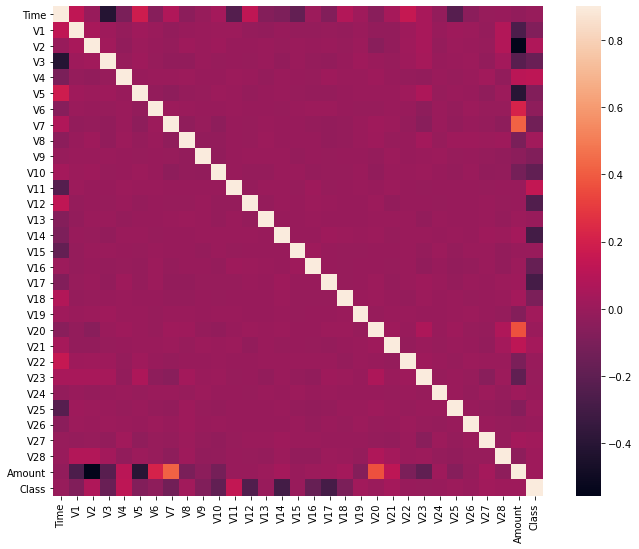

In [29]:
correlation_matrix = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(correlation_matrix, vmax = 0.9, square = True)
plt.show()

# Splitting
Next we will split the values.
For this purpose, we will create a variable X that contains all the data except the column "Class" and we will create another variable Y that contains ONLY the data of the column "Class". In this way we can know how good the algorithm used is. Essentially, we will operate on X and then we will compare with the values of Y, which is the pure reality.

In [32]:
columns = data.columns.tolist()
target = "Class"
columns = [c for c in columns if c not in target]
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


# Classical Machine Learning algorithms.
Now, we will use two classic machine learning algorithms: IsolationForest and the LocalOutlierFactor. In the case of IsolationForest we need the number of rows of all columns except Class, the Ratio_Fraud = Ratio_Fraud_percentage / 100 and the random_state = 1. On the other hand, in the Local Outlier Factor, we need the number of neighbors to calculate the local deviation ( ) and the Ratio_Fraud.


In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
state = 1
Ratio_Fraud_percentage /=100
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X), 
                                        contamination = Ratio_Fraud_percentage, 
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20,
                                               contamination = Ratio_Fraud_percentage)
              }

# Corriendo algoritmos
Next we will compare the results of the two algorithms. Before calculating the fraud error, what we do is transform 1-> 0 (no fraud) and -1-> 1 (fraud).

In [19]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    print("{}: {}".format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 72
0.997471998876444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.27      0.27      0.27        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 96
0.9966293318352586
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



# Conclusions-Conclusiones

We have used the Local Outlier Factor algorithm obtaining an overall success of 99.66%.
HOWEVER, this is only due to the number of initials 0's. That is, we have not counted the number of 1's well in the algorithm, since we have not given enough sample of initial 1's. Something similar happens with Isolation Forest (99.7% correct) where the error when counting 1's is approximately 70%. The alternatives that occur to me to improve is to take a larger fraction of data (computationally expensive) or to alter the number of initial 1's. That is, create a balanced .csv to efficiently train our algorithm. We are going to try to do this in Fraud_Detection_CML_balanced.



Hemos usado  el Local Outlier Factor para obtener un éxito del 99.66% en el total de los datos.
SIN EMBARGO, esto únicamente se debe al número de 0's iniciales. Es decir, no hemos contado nada bien el número de 1's en el algoritmo, ya que no le hemos dado suficiente sampling de 1's iniciales. Algo similar ocurre con Isolation Forest (99.7% acierto) donde el error a la hora de contar 1's es roughly del 70%. Las alternativas que se me ocurren para mejorarlo es coger una fracción de datos mayor (costoso computacionalmente) o alterar inicialmente el número de 1's. Es decir, crear un .csv que sea balanced para entrenar de una manera eficiente nuestro algoritmo. As a matter of fact, esto lo vamos a intentar hacer en Fraud_Detection_CML_balanced.